# Machine Learning Model Comparison Framework

## Tujuan
Template ini membantu Anda menemukan model terbaik untuk dataset tertentu dengan:
- Menguji multiple regression models
- Membandingkan performa dengan metrics standar
- Visualisasi hasil perbandingan
- Rekomendasi model terbaik

## Models yang Diuji
1. Multiple Linear Regression
2. Polynomial Regression
3. Support Vector Regression (SVR)
4. Decision Tree Regression
5. Random Forest Regression
6. Gradient Boosting Regression
7. XGBoost Regression (optional)

## Metrics Evaluasi
- R² Score (coefficient of determination)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Training time

## Import All Required Libraries


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Model imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Optional: XGBoost (uncomment if installed)
# try:
#     from xgboost import XGBRegressor
#     XGBOOST_AVAILABLE = True
# except ImportError:
#     XGBOOST_AVAILABLE = False
#     print("⚠ XGBoost not installed. Install with: pip install xgboost")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Load Dataset

Ganti 'dataset/Data.csv' dengan path dataset Anda.
Dataset harus dalam format:
- Baris: samples
- Kolom: features + target (target di kolom terakhir)

In [28]:
# Load dataset
dataset = pd.read_csv('dataset/Data.csv')

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nDataset shape: {dataset.shape}")
print(f"Rows (samples): {dataset.shape[0]}")
print(f"Columns (features + target): {dataset.shape[1]}")

print("\nFirst 5 rows:")
print(dataset.head())

DATASET OVERVIEW

Dataset shape: (9568, 5)
Rows (samples): 9568
Columns (features + target): 5

First 5 rows:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [29]:
print("\nDataset Info:")
print(dataset.info())

print("\nStatistical Summary:")
print(dataset.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None

Statistical Summary:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830

In [30]:
# Check missing values
print("\nMissing Values:")
missing = dataset.isnull().sum()
print(missing)

if missing.sum() > 0:
    print(f"\n⚠ Warning: Found {missing.sum()} missing values")
    print("Handling missing values...")
    dataset = dataset.fillna(dataset.mean())
    print("✓ Missing values filled with mean")


Missing Values:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


## Data Preparation

Split dataset into:
- X: Features (all columns except last)
- y: Target (last column)
- Train/Test split: 80/20

In [31]:
# Separate features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("\n" + "="*70)
print("DATA PREPARATION")
print("="*70)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


DATA PREPARATION
Features (X) shape: (9568, 4)
Target (y) shape: (9568,)


In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain-Test Split:")
print(f"  Training set: {X_train.shape[0]} samples (80%)")
print(f"  Test set: {X_test.shape[0]} samples (20%)")


Train-Test Split:
  Training set: 7654 samples (80%)
  Test set: 1914 samples (20%)


In [33]:
# Feature scaling for certain models
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()

print("\n✓ Data preparation completed")


✓ Data preparation completed


## Model Comparison Framework

Class untuk menjalankan dan membandingkan semua models.

In [34]:
import time

class ModelComparison:
    """
    Framework untuk compare multiple ML models
    """
    
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
        self.X_train_scaled = sc_X.fit_transform(X_train)
        self.X_test_scaled = sc_X.transform(X_test)
        self.y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()
        
        self.results = {}
        self.models = {}
        
    def evaluate_model(self, model, X_train, X_test, y_train, y_test, model_name):
        """
        Evaluate single model and return metrics
        """
        # Training
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Metrics
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        
        # Cross-validation score
        try:
            cv_scores = cross_val_score(model, X_train, y_train, 
                                       cv=5, scoring='r2')
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
        except:
            cv_mean = None
            cv_std = None
        
        return {
            'model': model,
            'model_name': model_name,
            'r2_train': r2_train,
            'r2_test': r2_test,
            'mse': mse_test,
            'rmse': rmse_test,
            'mae': mae_test,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'training_time': training_time,
            'predictions': y_pred_test
        }
    
    def run_all_models(self):
        """
        Run all regression models and store results
        """
        print("\n" + "="*70)
        print("RUNNING ALL MODELS")
        print("="*70)
        
        # 1. Multiple Linear Regression
        print("\n1. Training Multiple Linear Regression...")
        mlr = LinearRegression()
        self.results['Multiple Linear Regression'] = self.evaluate_model(
            mlr, self.X_train, self.X_test, self.y_train, self.y_test,
            'Multiple Linear Regression'
        )
        
        # 2. Polynomial Regression (degree 2)
        print("2. Training Polynomial Regression (degree=2)...")
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(self.X_train)
        X_test_poly = poly.transform(self.X_test)
        pr = LinearRegression()
        self.results['Polynomial Regression'] = self.evaluate_model(
            pr, X_train_poly, X_test_poly, self.y_train, self.y_test,
            'Polynomial Regression'
        )
        
        # 3. Support Vector Regression
        print("3. Training Support Vector Regression...")
        svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
        result = self.evaluate_model(
            svr, self.X_train_scaled, self.X_test_scaled, 
            self.y_train_scaled, self.y_test, 'SVR'
        )
        # Inverse transform predictions for SVR
        result['predictions'] = sc_y.inverse_transform(
            result['predictions'].reshape(-1, 1)
        ).flatten()
        self.results['Support Vector Regression'] = result
        
        # 4. Decision Tree Regression
        print("4. Training Decision Tree Regression...")
        dtr = DecisionTreeRegressor(random_state=42)
        self.results['Decision Tree'] = self.evaluate_model(
            dtr, self.X_train, self.X_test, self.y_train, self.y_test,
            'Decision Tree'
        )
        
        # 5. Random Forest Regression
        print("5. Training Random Forest Regression...")
        rfr = RandomForestRegressor(n_estimators=100, random_state=42)
        self.results['Random Forest'] = self.evaluate_model(
            rfr, self.X_train, self.X_test, self.y_train, self.y_test,
            'Random Forest'
        )
        
        # 6. Gradient Boosting Regression
        print("6. Training Gradient Boosting Regression...")
        gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
        self.results['Gradient Boosting'] = self.evaluate_model(
            gbr, self.X_train, self.X_test, self.y_train, self.y_test,
            'Gradient Boosting'
        )
        
        # 7. XGBoost (optional)
        # if XGBOOST_AVAILABLE:
        #     print("7. Training XGBoost Regression...")
        #     xgb = XGBRegressor(n_estimators=100, random_state=42)
        #     self.results['XGBoost'] = self.evaluate_model(
        #         xgb, self.X_train, self.X_test, self.y_train, self.y_test,
        #         'XGBoost'
        #     )
        
        print("\n✓ All models trained successfully!")
        return self.results
    
    def get_results_dataframe(self):
        """
        Convert results to pandas DataFrame for easy comparison
        """
        df_data = []
        for model_name, metrics in self.results.items():
            df_data.append({
                'Model': model_name,
                'R² Train': metrics['r2_train'],
                'R² Test': metrics['r2_test'],
                'MSE': metrics['mse'],
                'RMSE': metrics['rmse'],
                'MAE': metrics['mae'],
                'CV Mean': metrics['cv_mean'] if metrics['cv_mean'] else np.nan,
                'CV Std': metrics['cv_std'] if metrics['cv_std'] else np.nan,
                'Training Time (s)': metrics['training_time']
            })
        
        df = pd.DataFrame(df_data)
        df = df.sort_values('R² Test', ascending=False)
        return df
    
    def print_results(self):
        """
        Print formatted results table
        """
        df = self.get_results_dataframe()
        
        print("\n" + "="*70)
        print("MODEL COMPARISON RESULTS")
        print("="*70)
        print("\n" + df.to_string(index=False))
        
        # Best model
        best_model = df.iloc[0]
        print("\n" + "="*70)
        print("🏆 BEST MODEL")
        print("="*70)
        print(f"Model: {best_model['Model']}")
        print(f"R² Score (Test): {best_model['R² Test']:.4f}")
        print(f"RMSE: {best_model['RMSE']:.4f}")
        print(f"MAE: {best_model['MAE']:.4f}")
        
        return df

## Execute Model Comparison

Run all models and collect results.

In [35]:
# Initialize comparison framework
comparison = ModelComparison(X_train, X_test, y_train, y_test)

# Run all models
results = comparison.run_all_models()

# Print results
results_df = comparison.print_results()


RUNNING ALL MODELS

1. Training Multiple Linear Regression...
2. Training Polynomial Regression (degree=2)...
3. Training Support Vector Regression...
4. Training Decision Tree Regression...
5. Training Random Forest Regression...
6. Training Gradient Boosting Regression...

✓ All models trained successfully!

MODEL COMPARISON RESULTS

                     Model  R² Train     R² Test           MSE       RMSE        MAE  CV Mean   CV Std  Training Time (s)
             Random Forest  0.994372    0.963678     10.535551   3.245851   2.329050 0.958810 0.003385           2.309522
         Gradient Boosting  0.952572    0.949461     14.659248   3.828740   2.948743 0.947344 0.002991           0.710700
     Polynomial Regression  0.937709    0.938278     17.903054   4.231200   3.351350 0.937473 0.002911           0.002148
             Decision Tree  1.000000    0.932794     19.493763   4.415174   3.009331 0.925358 0.006210           0.034119
Multiple Linear Regression  0.928332    0.930105   

## Visualize Model Performance

Compare models across different metrics.

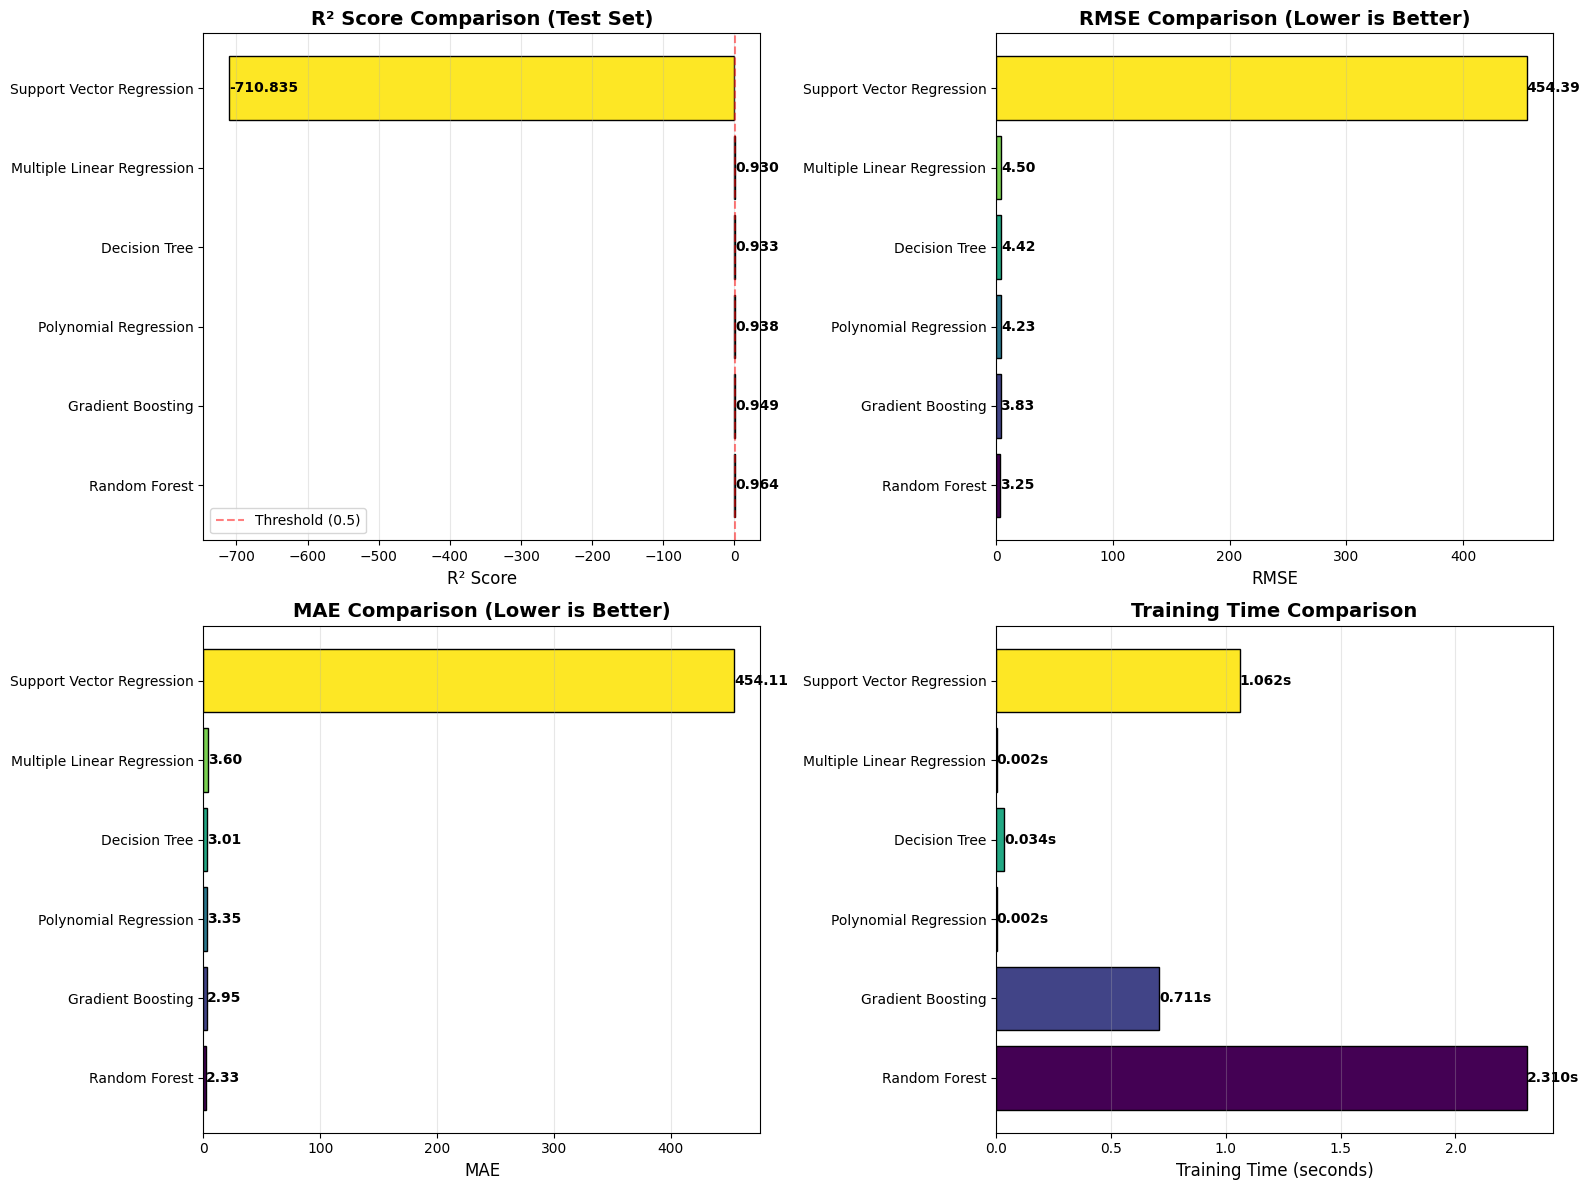

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score comparison
ax1 = axes[0, 0]
models = results_df['Model']
r2_test = results_df['R² Test']
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

bars1 = ax1.barh(models, r2_test, color=colors, edgecolor='black')
ax1.set_xlabel('R² Score', fontsize=12)
ax1.set_title('R² Score Comparison (Test Set)', fontsize=14, fontweight='bold')
ax1.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold (0.5)')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars1:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# RMSE comparison
ax2 = axes[0, 1]
rmse = results_df['RMSE']
bars2 = ax2.barh(models, rmse, color=colors, edgecolor='black')
ax2.set_xlabel('RMSE', fontsize=12)
ax2.set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for bar in bars2:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# MAE comparison
ax3 = axes[1, 0]
mae = results_df['MAE']
bars3 = ax3.barh(models, mae, color=colors, edgecolor='black')
ax3.set_xlabel('MAE', fontsize=12)
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

for bar in bars3:
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Training time comparison
ax4 = axes[1, 1]
training_time = results_df['Training Time (s)']
bars4 = ax4.barh(models, training_time, color=colors, edgecolor='black')
ax4.set_xlabel('Training Time (seconds)', fontsize=12)
ax4.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

for bar in bars4:
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}s',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## Visualize Best Model Predictions

Compare actual vs predicted values for the best model.

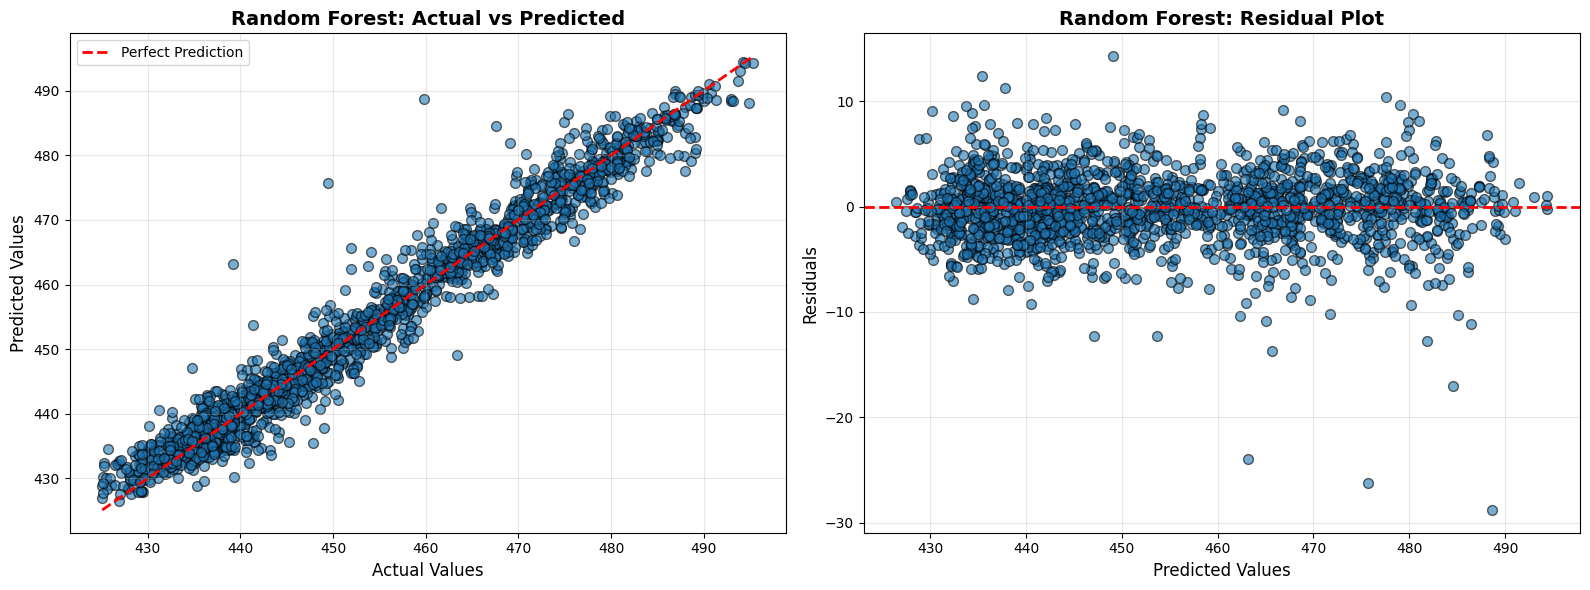


✓ Visualizations for best model (Random Forest) generated


In [37]:
best_model_name = results_df.iloc[0]['Model']
best_predictions = results[best_model_name]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Actual vs Predicted
ax1 = axes[0]
ax1.scatter(y_test, best_predictions, alpha=0.6, s=50, edgecolor='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Values', fontsize=12)
ax1.set_ylabel('Predicted Values', fontsize=12)
ax1.set_title(f'{best_model_name}: Actual vs Predicted', 
              fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Residual plot
ax2 = axes[1]
residuals = y_test - best_predictions
ax2.scatter(best_predictions, residuals, alpha=0.6, s=50, edgecolor='black')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Values', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title(f'{best_model_name}: Residual Plot', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Visualizations for best model ({best_model_name}) generated")

## Error Analysis for Best Model

Analyze prediction errors in detail.

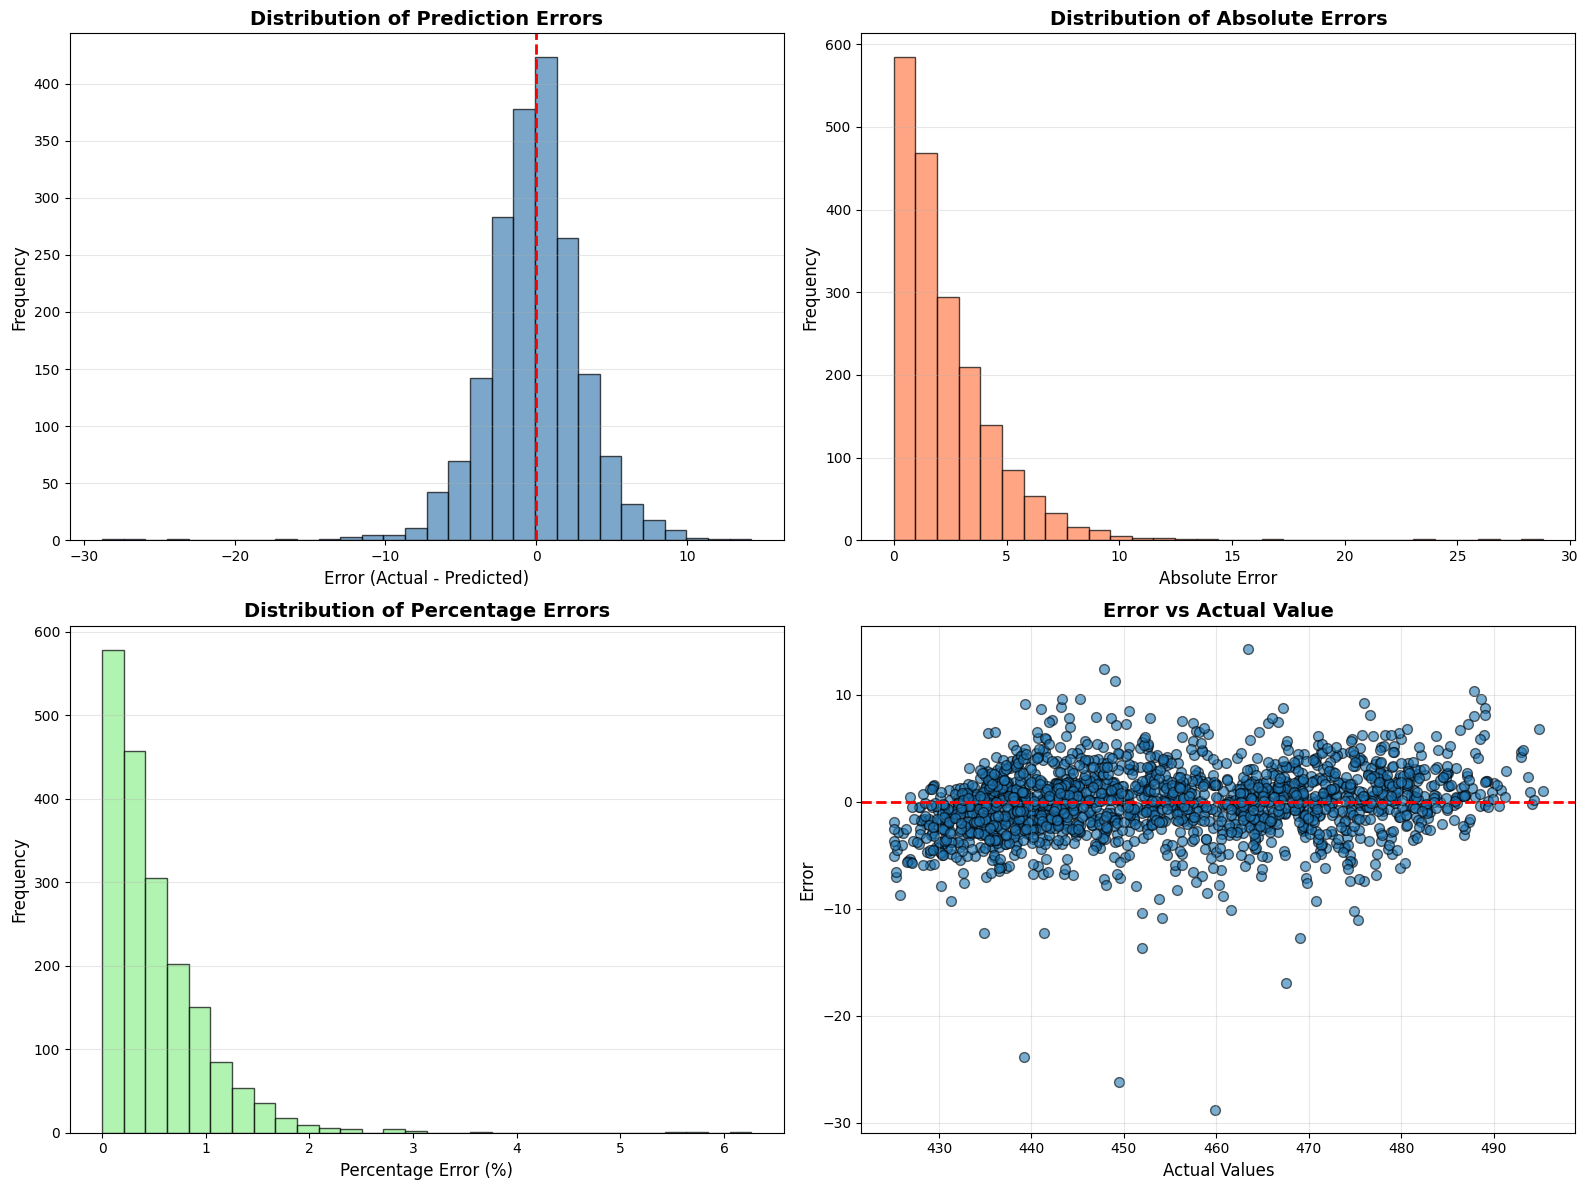


ERROR STATISTICS
Mean Error: -0.1337
Std Error: 3.2431
Mean Absolute Error: 2.3290
Mean Percentage Error: 0.51%


In [38]:
errors = y_test - best_predictions
abs_errors = np.abs(errors)
percentage_errors = (abs_errors / y_test) * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Error distribution
ax1 = axes[0, 0]
ax1.hist(errors, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Error (Actual - Predicted)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Absolute error distribution
ax2 = axes[0, 1]
ax2.hist(abs_errors, bins=30, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Absolute Error', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of Absolute Errors', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Percentage error distribution
ax3 = axes[1, 0]
ax3.hist(percentage_errors, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Percentage Error (%)', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Distribution of Percentage Errors', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Error vs Actual value
ax4 = axes[1, 1]
ax4.scatter(y_test, errors, alpha=0.6, s=50, edgecolor='black')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Actual Values', fontsize=12)
ax4.set_ylabel('Error', fontsize=12)
ax4.set_title('Error vs Actual Value', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ERROR STATISTICS")
print("="*70)
print(f"Mean Error: {errors.mean():.4f}")
print(f"Std Error: {errors.std():.4f}")
print(f"Mean Absolute Error: {abs_errors.mean():.4f}")
print(f"Mean Percentage Error: {percentage_errors.mean():.2f}%")

## Cross-Validation Scores

Compare models using 5-fold cross-validation for more robust evaluation.

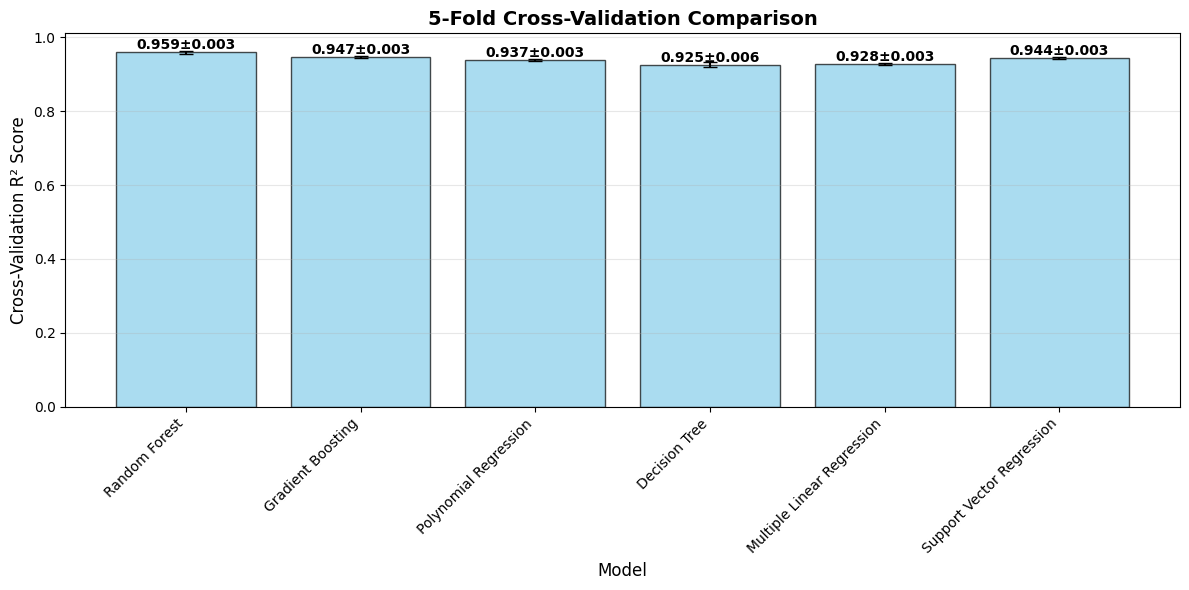

In [39]:
# Filter out models with CV scores
cv_data = results_df[results_df['CV Mean'].notna()].copy()

if len(cv_data) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    models_cv = cv_data['Model']
    cv_means = cv_data['CV Mean']
    cv_stds = cv_data['CV Std']
    
    x_pos = np.arange(len(models_cv))
    
    bars = ax.bar(x_pos, cv_means, yerr=cv_stds, capsize=5,
                   color='skyblue', edgecolor='black', alpha=0.7)
    
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('Cross-Validation R² Score', fontsize=12)
    ax.set_title('5-Fold Cross-Validation Comparison', fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models_cv, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (bar, mean, std) in enumerate(zip(bars, cv_means, cv_stds)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{mean:.3f}±{std:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Cross-validation scores not available for visualization")

## Model Recommendations and Insights

Berdasarkan hasil evaluasi, berikan rekomendasi model terbaik.

In [40]:
print("\n" + "="*70)
print("📊 MODEL PERFORMANCE ANALYSIS & RECOMMENDATIONS")
print("="*70)

best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]

print(f"\n🏆 BEST PERFORMING MODEL: {best_model['Model']}")
print("-"*70)
print(f"   R² Score: {best_model['R² Test']:.4f}")
print(f"   RMSE: {best_model['RMSE']:.4f}")
print(f"   MAE: {best_model['MAE']:.4f}")
print(f"   Training Time: {best_model['Training Time (s)']:.3f}s")

print(f"\n⚠ WORST PERFORMING MODEL: {worst_model['Model']}")
print("-"*70)
print(f"   R² Score: {worst_model['R² Test']:.4f}")
print(f"   RMSE: {worst_model['RMSE']:.4f}")


📊 MODEL PERFORMANCE ANALYSIS & RECOMMENDATIONS

🏆 BEST PERFORMING MODEL: Random Forest
----------------------------------------------------------------------
   R² Score: 0.9637
   RMSE: 3.2459
   MAE: 2.3290
   Training Time: 2.310s

⚠ WORST PERFORMING MODEL: Support Vector Regression
----------------------------------------------------------------------
   R² Score: -710.8348
   RMSE: 454.3934


In [41]:
print("\n" + "="*70)
print("💡 RECOMMENDATIONS")
print("="*70)

# Performance-based recommendations
r2_best = best_model['R² Test']

if r2_best >= 0.9:
    print("\n✓ Excellent Performance (R² ≥ 0.9)")
    print(f"  → {best_model['Model']} is highly recommended for deployment")
    print("  → Model captures 90%+ of data variance")
elif r2_best >= 0.7:
    print("\n✓ Good Performance (0.7 ≤ R² < 0.9)")
    print(f"  → {best_model['Model']} shows good predictive power")
    print("  → Consider feature engineering for improvement")
elif r2_best >= 0.5:
    print("\n⚠ Moderate Performance (0.5 ≤ R² < 0.7)")
    print("  → Model needs improvement")
    print("  → Try:")
    print("     - More feature engineering")
    print("     - Hyperparameter tuning")
    print("     - Collect more data")
else:
    print("\n✗ Poor Performance (R² < 0.5)")
    print("  → Model is not suitable for this dataset")
    print("  → Consider:")
    print("     - Checking data quality")
    print("     - Trying different algorithms")
    print("     - Re-evaluating problem formulation")


💡 RECOMMENDATIONS

✓ Excellent Performance (R² ≥ 0.9)
  → Random Forest is highly recommended for deployment
  → Model captures 90%+ of data variance


In [42]:
# Speed vs accuracy trade-off
print("\n" + "="*70)
print("⚖️ SPEED VS ACCURACY TRADE-OFF")
print("="*70)

fastest_model = results_df.loc[results_df['Training Time (s)'].idxmin()]
print(f"\nFastest Model: {fastest_model['Model']}")
print(f"  Training Time: {fastest_model['Training Time (s)']:.3f}s")
print(f"  R² Score: {fastest_model['R² Test']:.4f}")

if fastest_model['Model'] != best_model['Model']:
    time_diff = best_model['Training Time (s)'] - fastest_model['Training Time (s)']
    r2_diff = best_model['R² Test'] - fastest_model['R² Test']
    
    print(f"\nTrade-off Analysis:")
    print(f"  {best_model['Model']} is {time_diff:.2f}s slower")
    print(f"  but {r2_diff:.4f} ({r2_diff*100:.2f}%) more accurate")
    
    if time_diff < 1.0 and r2_diff > 0.05:
        print(f"\n  → Recommended: {best_model['Model']} (better accuracy, minimal time cost)")
    elif time_diff > 10.0 and r2_diff < 0.02:
        print(f"\n  → Recommended: {fastest_model['Model']} (much faster, similar accuracy)")
    else:
        print(f"\n  → Choose based on your priority: speed or accuracy")


⚖️ SPEED VS ACCURACY TRADE-OFF

Fastest Model: Multiple Linear Regression
  Training Time: 0.002s
  R² Score: 0.9301

Trade-off Analysis:
  Random Forest is 2.31s slower
  but 0.0336 (3.36%) more accurate

  → Choose based on your priority: speed or accuracy


## Save Best Model

Save model terbaik untuk deployment.

In [43]:
import pickle

# Get best model object
best_model_obj = results[best_model_name]['model']

# Create models directory if not exists
import os
os.makedirs('models', exist_ok=True)

# Save model
model_filename = f"models/best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(best_model_obj, f)

# Save scaler if needed (for SVR or models using scaling)
if 'SVR' in best_model_name or 'Support Vector' in best_model_name:
    with open('models/scaler_X.pkl', 'wb') as f:
        pickle.dump(sc_X, f)
    with open('models/scaler_y.pkl', 'wb') as f:
        pickle.dump(sc_y, f)
    print("✓ Scalers saved")

# Save results dataframe
results_df.to_csv('models/model_comparison_results.csv', index=False)

print(f"\n✓ Best model saved: {model_filename}")
print("✓ Results saved: models/model_comparison_results.csv")

print("\n" + "="*70)
print("📦 DEPLOYMENT READY")
print("="*70)
print(f"Model: {best_model_name}")
print(f"File: {model_filename}")
print("\nTo load model:")
print(f"  import pickle")
print(f"  with open('{model_filename}', 'rb') as f:")
print(f"      model = pickle.load(f)")


✓ Best model saved: models/best_model_random_forest.pkl
✓ Results saved: models/model_comparison_results.csv

📦 DEPLOYMENT READY
Model: Random Forest
File: models/best_model_random_forest.pkl

To load model:
  import pickle
  with open('models/best_model_random_forest.pkl', 'rb') as f:
      model = pickle.load(f)


## Generate Complete Summary Report

In [44]:
print("\n" + "="*70)
print("📋 COMPLETE PROJECT SUMMARY")
print("="*70)

print(f"\n📊 DATASET")
print("-"*70)
print(f"Total Samples: {len(dataset)}")
print(f"Features: {X.shape[1]}")
print(f"Train/Test Split: {len(X_train)}/{len(X_test)} (80/20)")

print(f"\n🤖 MODELS EVALUATED")
print("-"*70)
for i, model_name in enumerate(results_df['Model'], 1):
    print(f"{i}. {model_name}")




📋 COMPLETE PROJECT SUMMARY

📊 DATASET
----------------------------------------------------------------------
Total Samples: 9568
Features: 4
Train/Test Split: 7654/1914 (80/20)

🤖 MODELS EVALUATED
----------------------------------------------------------------------
1. Random Forest
2. Gradient Boosting
3. Polynomial Regression
4. Decision Tree
5. Multiple Linear Regression
6. Support Vector Regression


In [45]:
print(f"\n🏆 TOP 3 MODELS")
print("-"*70)
for i in range(min(3, len(results_df))):
    model = results_df.iloc[i]
    print(f"\n{i+1}. {model['Model']}")
    print(f"   R² Score: {model['R² Test']:.4f}")
    print(f"   RMSE: {model['RMSE']:.4f}")
    print(f"   MAE: {model['MAE']:.4f}")

print(f"\n✅ RECOMMENDATION")
print("-"*70)
print(f"Use: {best_model_name}")
print(f"Reason: Highest R² score ({best_model['R² Test']:.4f})")
print(f"Expected error: ±{best_model['MAE']:.2f} units")

print("\n" + "="*70)
print("           ✨ MODEL COMPARISON COMPLETED! ✨")
print("="*70)


🏆 TOP 3 MODELS
----------------------------------------------------------------------

1. Random Forest
   R² Score: 0.9637
   RMSE: 3.2459
   MAE: 2.3290

2. Gradient Boosting
   R² Score: 0.9495
   RMSE: 3.8287
   MAE: 2.9487

3. Polynomial Regression
   R² Score: 0.9383
   RMSE: 4.2312
   MAE: 3.3513

✅ RECOMMENDATION
----------------------------------------------------------------------
Use: Random Forest
Reason: Highest R² score (0.9637)
Expected error: ±2.33 units

           ✨ MODEL COMPARISON COMPLETED! ✨
